# TITANIC - MACHINE LEARNING FROM DISASTER PROJECT 
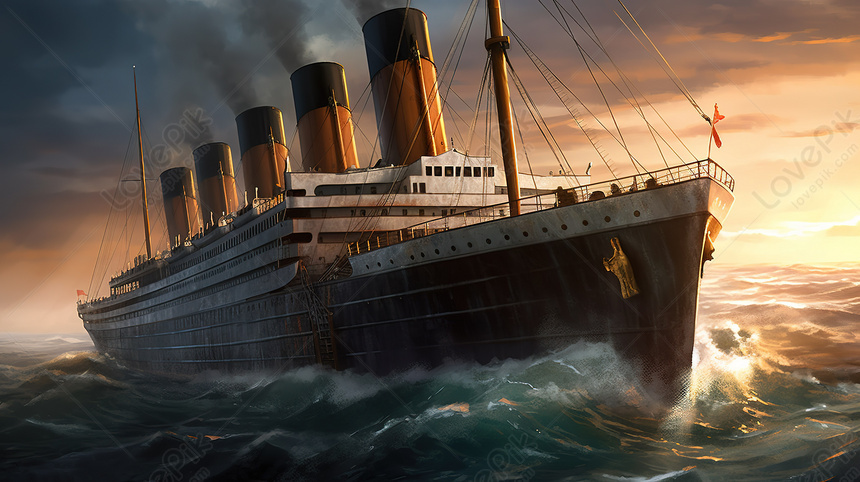

In [5]:
#import library 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [6]:
#import data

train_df = pd.read_csv('C:\\Users\\nbt13\\JupyterNotebook\\Data\\TitanicProject\\train.csv')
test_df = pd.read_csv('C:\\Users\\nbt13\\JupyterNotebook\\Data\\TitanicProject\\test.csv')

In [7]:
#preview data

train_df.set_index(train_df.PassengerId, inplace = True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.drop('PassengerId', axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [208]:
test_df = pd.read_csv('C:\\Users\\nbt13\\JupyterNotebook\\Data\\TitanicProject\\test.csv', index_col = "PassengerId")
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


### 1. Feature Classification 

In [211]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [13]:
train_df.Survived = train_df.Survived.astype('category')

In [19]:
converted_features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(train_df, converted_features)
convert_cat(test_df, converted_features)

### 2. Exploratory Data Analysis
#### 2.1 EDA For Catagorical Feature 

##### a. Survived Percentage

In [221]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [223]:
train_df["Survived"].value_counts(normalize = True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


##### b. Sex Percentage

In [226]:
train_df["Sex"].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [228]:
train_df["Sex"].value_counts(normalize = True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

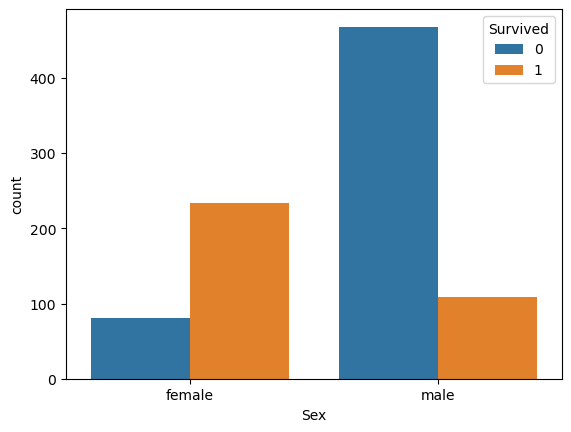

In [230]:
sns.countplot(data = train_df, x = "Sex", hue = 'Survived')

- Remaning Categorical Feature Columns

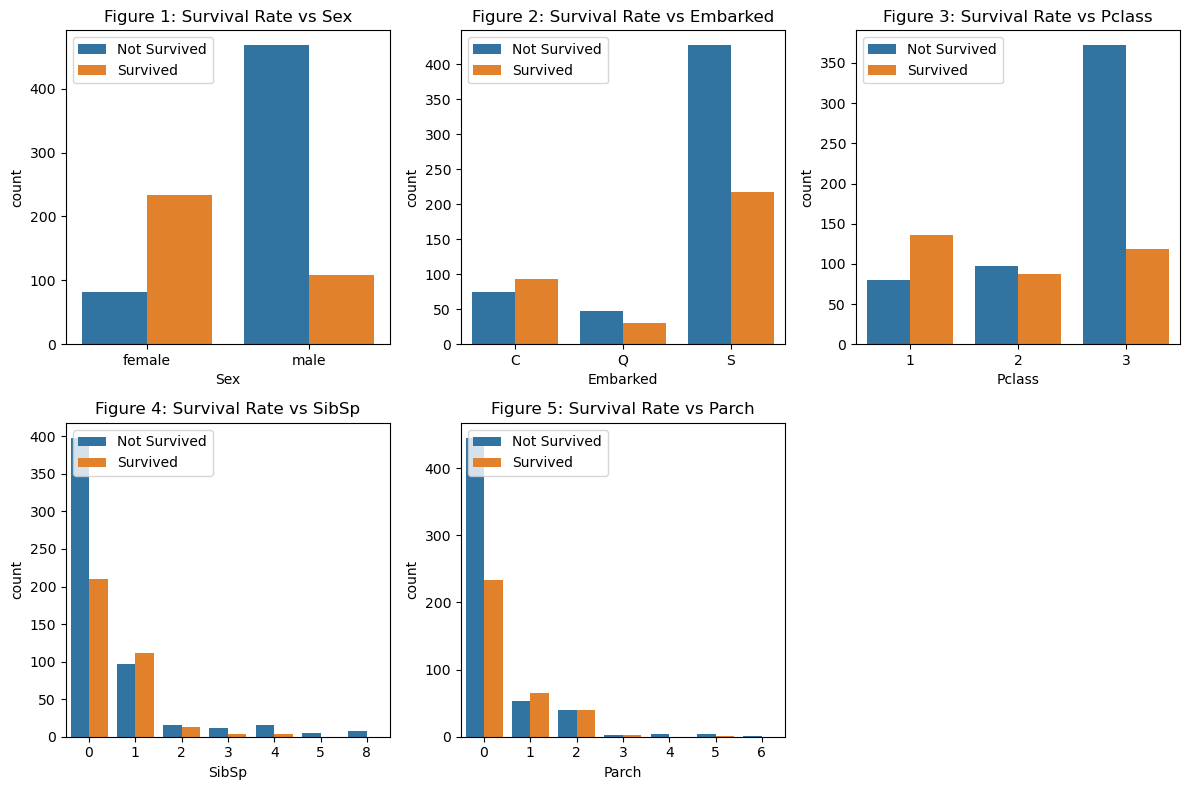

In [38]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols * 4, n_rows * 4))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data = train_df, x = cols[i], hue = 'Survived', ax = ax_i)
            ax_i.set_title(f"Figure {i + 1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc = 'upper left', labels = ['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False)
plt.tight_layout()

#### 2.2 EDA For Numerical Features

##### AGE

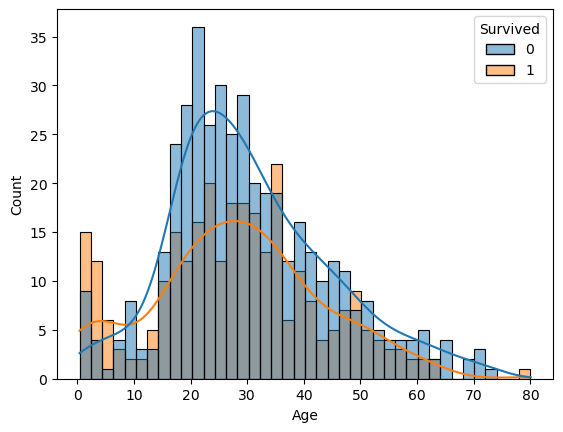

In [40]:
sns.histplot(data = train_df, x='Age', hue = 'Survived', bins = 40, kde=True);

##### FARE

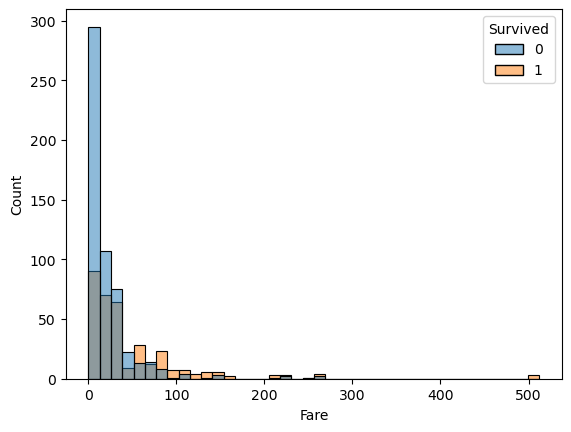

In [240]:
sns.histplot(data = train_df, x = 'Fare', hue = 'Survived', bins = 40);

## fare_categories = ['Economies', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels = fare_categories)
sns.countplot(x = quartile_data, hue = train_df['Survived']);

### 3. Feature Engineering & Data Wrangling 

#### 3.1 Feature Engineering
- a. Name

In [246]:
train_df['Name'].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [44]:
import re
def extract_title(name):
    p = re.compile(r", ([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name : extract_title(name))

In [250]:
test_df['Title'] = test_df['Name'].apply(lambda name : extract_title(name))

In [252]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else:
        return 'Others'
train_df['Title'] = train_df['Title'].apply(lambda title : group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title : group_title(title))
train_df['Title'].value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: count, dtype: int64

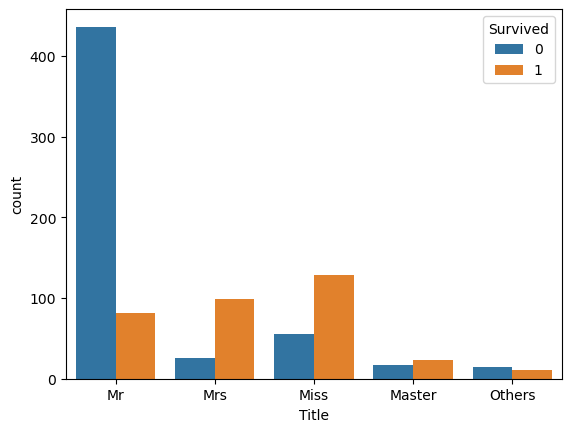

In [254]:
sns.countplot(data = train_df, x = 'Title', hue = 'Survived');

- b. Family
- 'SibSp', 'Parch'

In [257]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [259]:
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [272]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins = [0,1,4,6,20], labels = ['Solo', 'Small Fam', 'Medium Fam', 'Large Fam'])
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins = [0,1,4,6,20], labels = ['Solo', 'Small Fam', 'Medium Fam', 'Large Fam'])

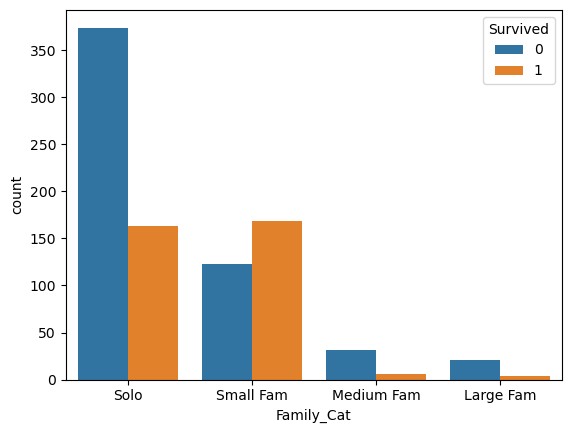

In [274]:
sns.countplot(data = train_df, x = 'Family_Cat', hue = 'Survived');

#### 3.2 Data Wrangling

In [352]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [406]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"Col {col} has {missing_count*100/n_rows:.2f}% missing values")
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Col Embarked has 0.22% missing values
Col Fare has 0.24% missing values


### Filling missing values
#### Age 
- Filling missing values with meadian of whole dataset

In [52]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'], observed=False)['Age'].median()

In [54]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [60]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'], observed=False)['Age'].transform(lambda x: x.fillna(x.median()))

In [58]:
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'], observed=False)['Age'].transform(lambda x: x.fillna(x.median()))

In [443]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Col Embarked has 0.22% missing values
Col Fare has 0.24% missing values


In [444]:
x = train_df[feature_cols]
y = train_df['Survived']

In [445]:
x_test = test_df[feature_cols]

In [446]:
# preprocess pipeline 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('Scaler', StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('Encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

In [449]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [453]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('Scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [454]:
x = preprocessor.transform(x)
x_test = preprocessor.transform(x_test)

### 4. Model Training 

In [525]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

In [527]:
# binary classification
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear', max_iter = 1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [529]:
log_reg.score(x_val, y_val)

0.8659217877094972

In [531]:
y_pred =log_reg.predict(x_val)

In [533]:
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
precision

0.7868852459016393

In [535]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       120
           1       0.79      0.81      0.80        59

    accuracy                           0.87       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.87      0.87      0.87       179



### TREE MODEL


In [608]:
from sklearn.tree import DecisionTreeClassifier

In [610]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 2022)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [611]:
decision_tree.score(x_val, y_val)

0.8547486033519553

#### 4.1 Cross Validation

In [615]:
from sklearn.model_selection import cross_val_score

In [650]:
log_reg_cv = LogisticRegression(solver = 'liblinear', max_iter = 1000)
dt_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 2022)

lr_scores = cross_val_score(log_reg_cv, x, y, scoring = 'accuracy', cv = 5)
lr_scores.mean(), lr_scores.std()
dt_scores = cross_val_score(dt_cv, x, y, scoring = 'accuracy', cv = 5)
dt_scores.mean(), dt_scores.std()

(0.8137216747222397, 0.014388618786467437)

### 4.2 Baseline Model Comparasion

In [652]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [653]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
seed = 2023
models = [
    LinearSVC(random_state = seed),
    SVC(random_state = seed),
    KNeighborsClassifier(metric = 'minkowski', p = 2),
    LogisticRegression(solver = 'liblinear', max_iter = 12000),
    DecisionTreeClassifier(random_state = seed),
    RandomForestClassifier(random_state = seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = seed)
    
]

C:\Users\nbt13\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\nbt13\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\nbt13\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\nbt13\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\nbt

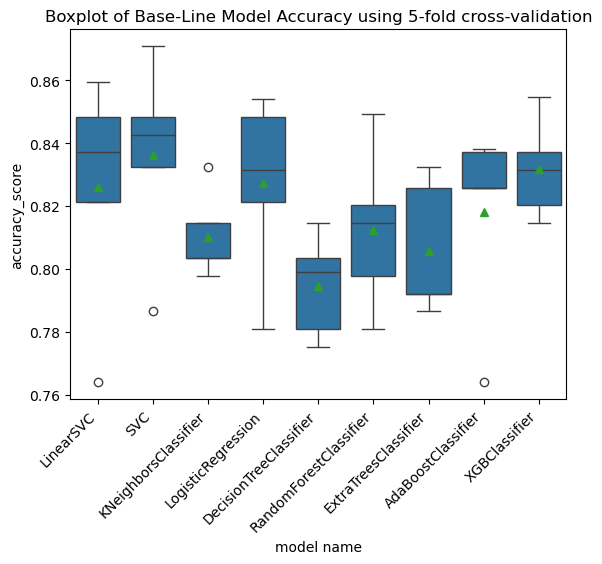

,model name,fold_id,accuracy_score
0,LinearSVC,0,0.821229
1,LinearSVC,1,0.859551
2,LinearSVC,2,0.848315
3,LinearSVC,3,0.837079
4,LinearSVC,4,0.764045
5,SVC,0,0.832402
6,SVC,1,0.870787
7,SVC,2,0.842697
8,SVC,3,0.848315
9,SVC,4,0.786517


In [683]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, x, y, metrics, cv=5, plot_results=False):
    kfold = StratifiedKFold(cv, shuffle = True, random_state = seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        score = cross_val_score(model, x, y, scoring = metrics, cv = kfold)
        for fold_idx, score in enumerate(score):
            entries.append((model_name, fold_idx, score))
    cv_df = pd.DataFrame(entries, columns=['model name', 'fold_id', 'accuracy_score'])
    
    if plot_results:
        sns.boxplot(x='model name', y='accuracy_score', data=cv_df, showmeans=True)
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45, ha='right')  # Xoay nhãn mô hình 45 độ
        plt.show()
    return cv_df
generate_baseline_results(models, x, y, metrics = 'accuracy', cv = 5, plot_results = True)
